#Financial Portfolio Analysis

The financial portfolio analysis tool is designed to provide insights into the performance of a financial portfolio over time. This project leverages historical stock prices for selected securities to offer a comprehensive understanding of investment trends.

This dataset contains the following information:

- **Adj Close:** Stock closing prices adjusted for dividends and stock splits(numeric).

- **Open, Close, High, Low Prices:** Various stock price indicators for each security (numeric)

- **Date:** The date of the stock prices (mm-dd-yyyy).

- **Symbol:** Unique three-letter codes representing the securities(text).

- **Volume:** The trading volume for each security(numeric).

**Let us start by importing the necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Next, importing the EXCEL file called Stock Portfolio.xlsx which contains information about the portfolio.**

In [ ]:
# Reading in the Excel file as a DataFrame
df=pd.read_excel('/content/drive/MyDrive/Data-set/Stock Portfolio.xlsx')
df

,Adj Close,Close,Date,High,Low,Open,Symbol,Volume
0,1.958333,1.958333,1997-05-15,2.500000,1.927083,2.437500,AMZN,72156000
1,1.729167,1.729167,1997-05-16,1.979167,1.708333,1.968750,AMZN,14700000
2,1.708333,1.708333,1997-05-19,1.770833,1.625000,1.760417,AMZN,6106800
3,1.635417,1.635417,1997-05-20,1.750000,1.635417,1.729167,AMZN,5467200
4,1.427083,1.427083,1997-05-21,1.645833,1.375000,1.635417,AMZN,18853200
...,...,...,...,...,...,...,...,...
49666,320.079987,320.079987,2017-10-30,323.779999,317.250000,319.179993,TSLA,4254400
49667,331.529999,331.529999,2017-10-31,331.950012,320.179993,320.230011,TSLA,5672300
49668,321.079987,321.079987,2017-11-01,332.609985,320.260010,332.250000,TSLA,8457300
49669,299.260010,299.260010,2017-11-02,308.690002,292.630005,300.130005,TSLA,19791400


**Before we begin our analysis, let us convert the date columns to Pandas datetime values.**

**This will help to standarize such data across the multiple datasets that we work with and it will also help us use ready-made functions.**

In [ ]:
# Converting to datetime.date values
df['Date'] = pd.to_datetime(df['Date']).dt.date
df

,Adj Close,Close,Date,High,Low,Open,Symbol,Volume
0,1.958333,1.958333,1997-05-15,2.500000,1.927083,2.437500,AMZN,72156000
1,1.729167,1.729167,1997-05-16,1.979167,1.708333,1.968750,AMZN,14700000
2,1.708333,1.708333,1997-05-19,1.770833,1.625000,1.760417,AMZN,6106800
3,1.635417,1.635417,1997-05-20,1.750000,1.635417,1.729167,AMZN,5467200
4,1.427083,1.427083,1997-05-21,1.645833,1.375000,1.635417,AMZN,18853200
...,...,...,...,...,...,...,...,...
49666,320.079987,320.079987,2017-10-30,323.779999,317.250000,319.179993,TSLA,4254400
49667,331.529999,331.529999,2017-10-31,331.950012,320.179993,320.230011,TSLA,5672300
49668,321.079987,321.079987,2017-11-01,332.609985,320.260010,332.250000,TSLA,8457300
49669,299.260010,299.260010,2017-11-02,308.690002,292.630005,300.130005,TSLA,19791400


**Now, we will analyze a financial portfolio by computing and presenting key metrics derived from a given dataset**

**Calculate and Display Average Price and Total Average Price:**

We proceeds to calculate the average price per security and the total average price by taking into account the opening and closing prices. Then print a subset of the DataFrame containing the symbols of the securities and their corresponding total average prices.

In [ ]:
df["Avg Price"] = (df["Open"] + df["Close"]) / 2
df["Total Avg Price"]=df["Avg Price"]*df['Volume']
print(df.loc[:, ["Symbol", "Total Avg Price"]])

      Symbol  Total Avg Price
0       AMZN     1.585929e+08
1       AMZN     2.717969e+07
2       AMZN     1.059148e+07
3       AMZN     9.197427e+06
4       AMZN     2.886896e+07
...      ...              ...
49666   TSLA     1.359834e+09
49667   TSLA     1.848489e+09
49668   TSLA     2.762704e+09
49669   TSLA     5.931384e+09
49670   TSLA     2.678706e+09

[49671 rows x 2 columns]


### Financial Data Aggregation by Symbol and Year

**Create a Year Column:**

Here, we are creating a new column named "Year" in the DataFrame (df). This column is derived from the "Date" column, representing the year corresponding to each date.The DataFrame is then grouped by two key variables - "Symbol" (representing different financial securities) and "Year" (representing the calendar year). The grouping is done to aggregate data based on these two criteria.

In [ ]:
df["Year"] = pd.to_datetime(df["Date"]).dt.year

# Group by symbol and year, calculate sum of volume average price
grouped_df = df.groupby(["Symbol", "Year",])["Avg Price"].sum()
print(grouped_df)

Symbol  Year
AMZN    1997      499.270836
        1998     3932.721999
        1999    17447.350189
        2000    11735.132599
        2001     3033.621152
                    ...     
TSLA    2013    26311.024933
        2014    56289.805050
        2015    57944.230097
        2016    52898.039975
        2017    66846.455038
Name: Avg Price, Length: 189, dtype: float64


### Aggregating Total Volume by Symbol

**Group by Symbol:**

Now, we will be organizing the data based on different symbols representing financial securities.

In [ ]:
# Group by symbol and calculate the sum of volume
grouped_df = df.groupby("Symbol")["Volume"].sum()
print(grouped_df)

Symbol
AMZN     40644646600
DATA      1352640500
DIS      77631907700
FB       52424188800
GOOG     26655221100
KO      165644523200
PEP      46873890300
TSLA      8316603900
Name: Volume, dtype: int64


## Creating a Portfolio Pie Chart

 Here, we generates a pie chart to visually represent the distribution of total trading volume across different symbols in a financial portfolio.The resulting pie chart provides a quick and intuitive overview of the proportion of trading volume associated with each symbol in the portfolio.

Text(0.5, 1.0, 'Portfolio Pie Chart')

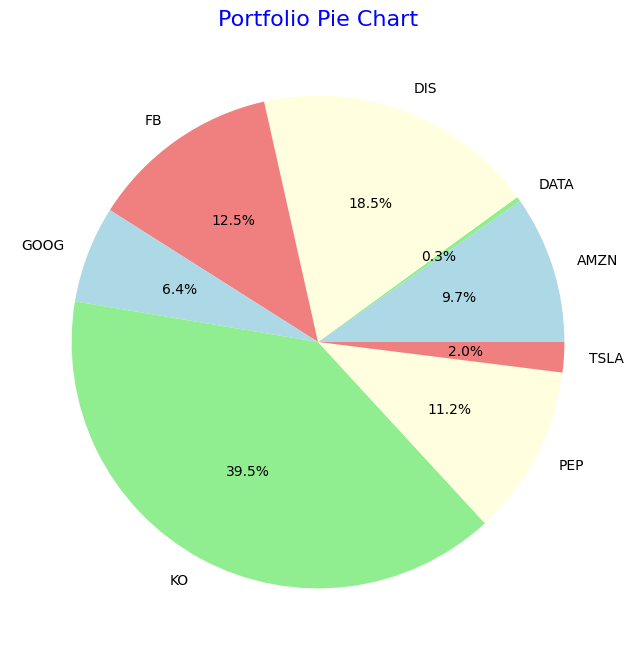

In [ ]:
colors = ["lightblue", "lightgreen", "lightyellow", "lightcoral"]


plt.figure(figsize=(8, 8))
# Create the pie chart trading volume associated with each symbol
plt.pie(
    grouped_df,
    #labels for each pie slice using the index of the DataFrame
    labels=grouped_df.index,
    autopct="%1.1f%%",
    colors=colors,
   )
#Title
plt.title("Portfolio Pie Chart", fontsize=16,color='blue')

### Plotting High and Low Prices Over Time for Each Symbol

Now, we generate separate line plots for the high and low prices of each financial symbol over time. Each plot is displayed in a distinct figure, providing a clear visualization of how high and low prices fluctuate for different symbols throughout the years

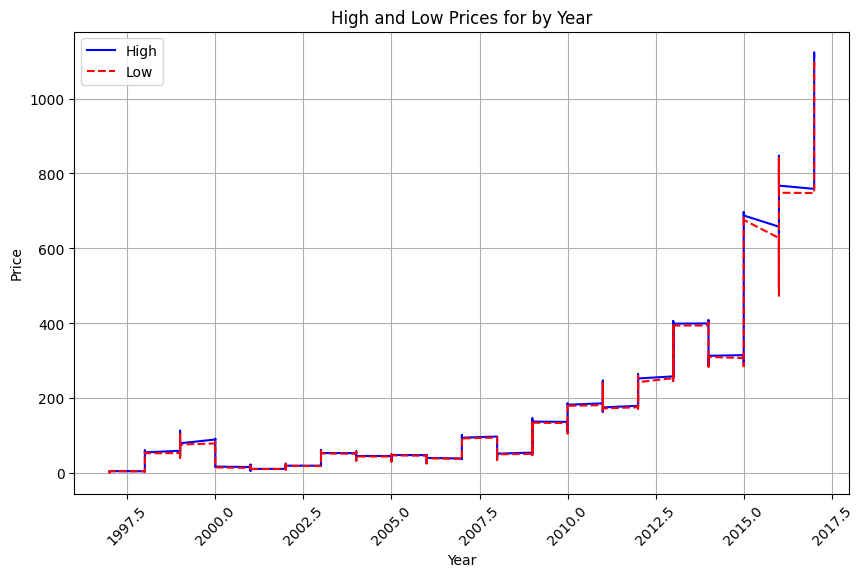

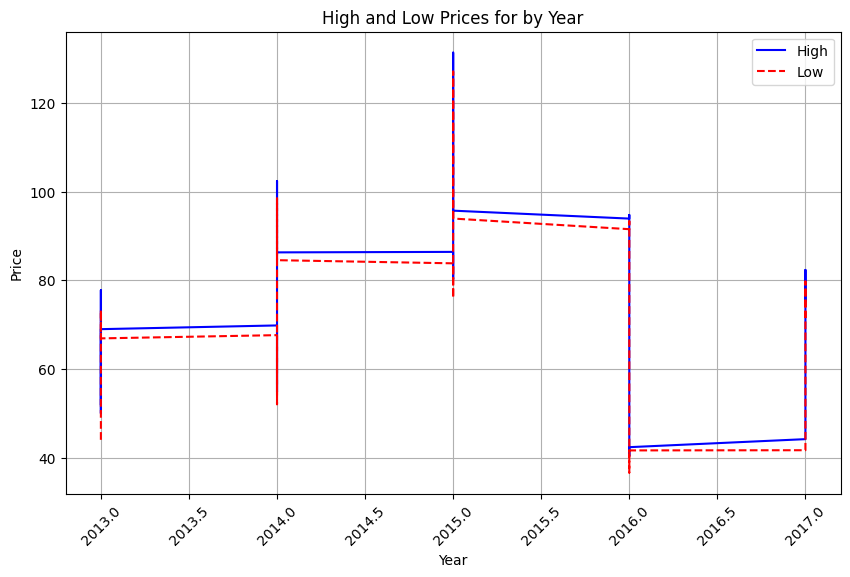

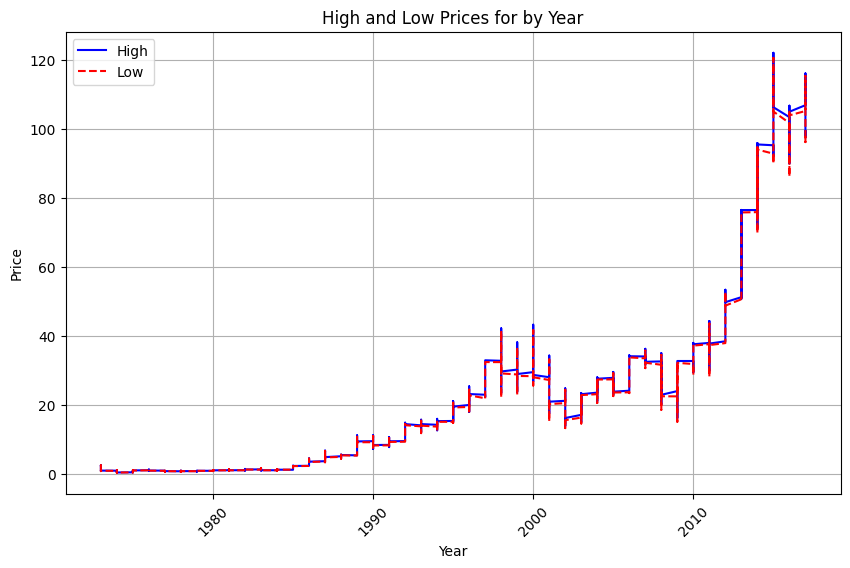

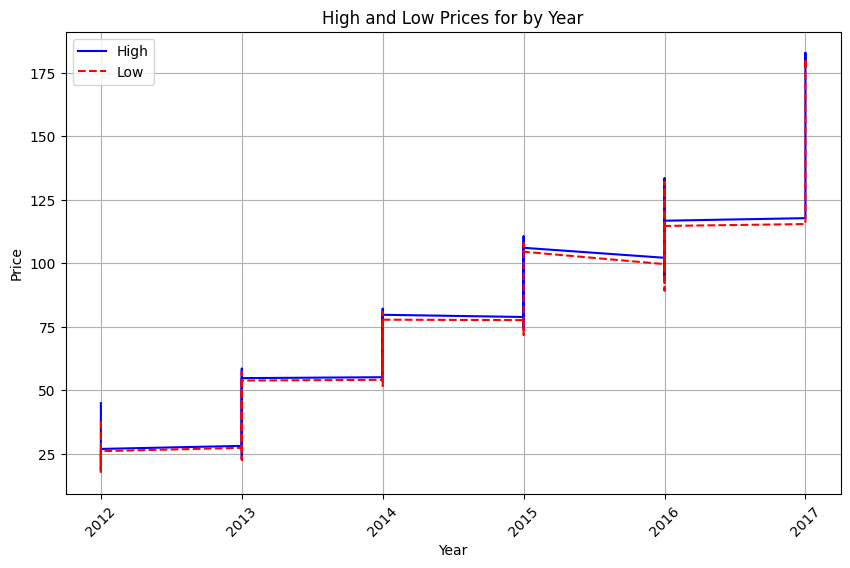

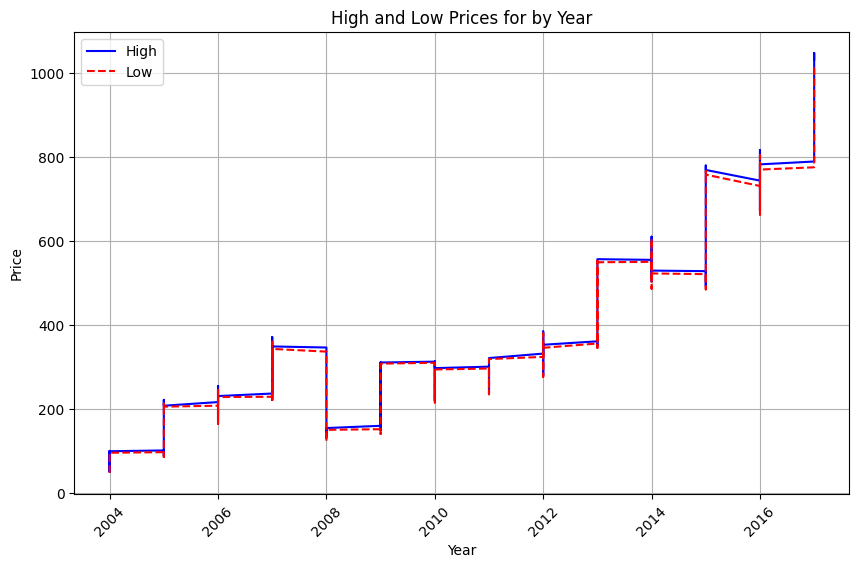

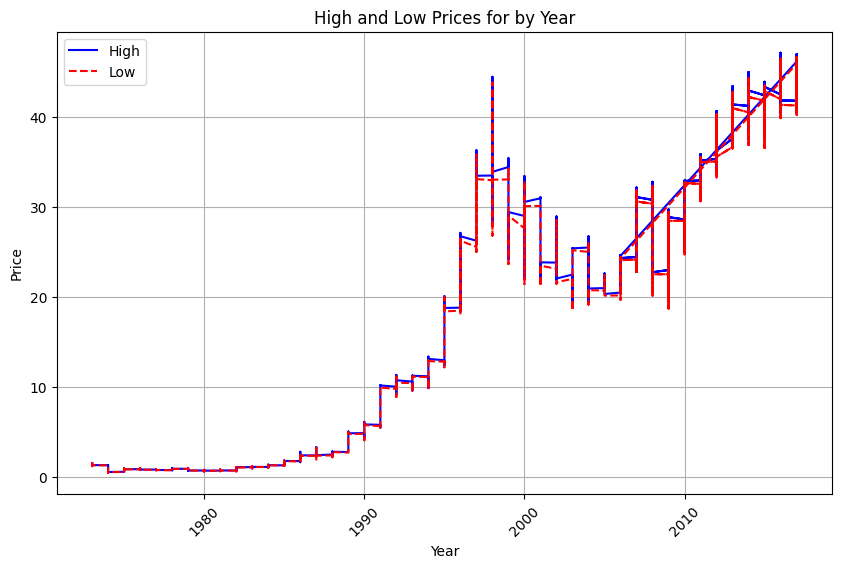

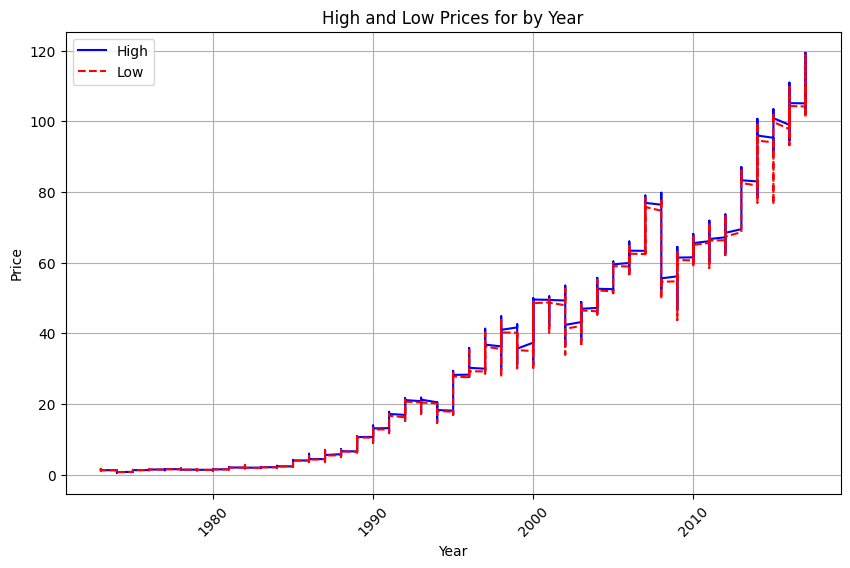

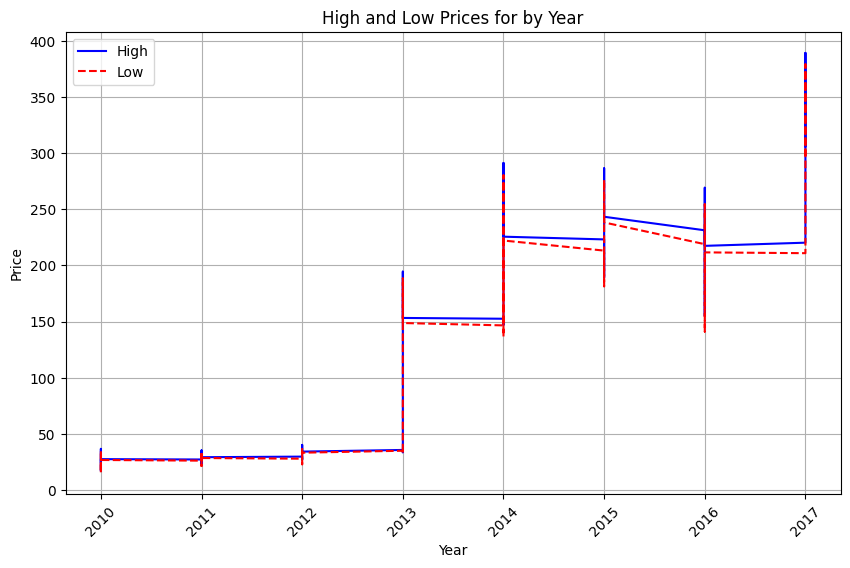

In [ ]:
# Extract year from the date column
df["Year"] = pd.to_datetime(df["Date"]).dt.year

# Iterate through each symbol
for symbol in df["Symbol"].unique():
    # Filter data for the current symbol
    symbol_data = df[df["Symbol"] == symbol]

    # Create a separate plot for each symbol
    plt.figure(figsize=(10, 6))

    # Plot high and low values with different colors and line styles
    plt.plot(symbol_data["Year"], symbol_data["High"], label="High", color="blue", linestyle="-")
    plt.plot(symbol_data["Year"], symbol_data["Low"], label="Low", color="red", linestyle="--")

    # Customize plot elements
    plt.xlabel("Year")
    plt.ylabel("Price")
    plt.title("High and Low Prices for by Year")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)

    plt.show()

### Creating Volume Distribution Pie Charts for Each Symbol

Here, we generate separate pie charts for the volume distribution across different years for each financial symbol. Each chart provides a visual representation of how the trading volume is distributed among the years for a specific symbol.

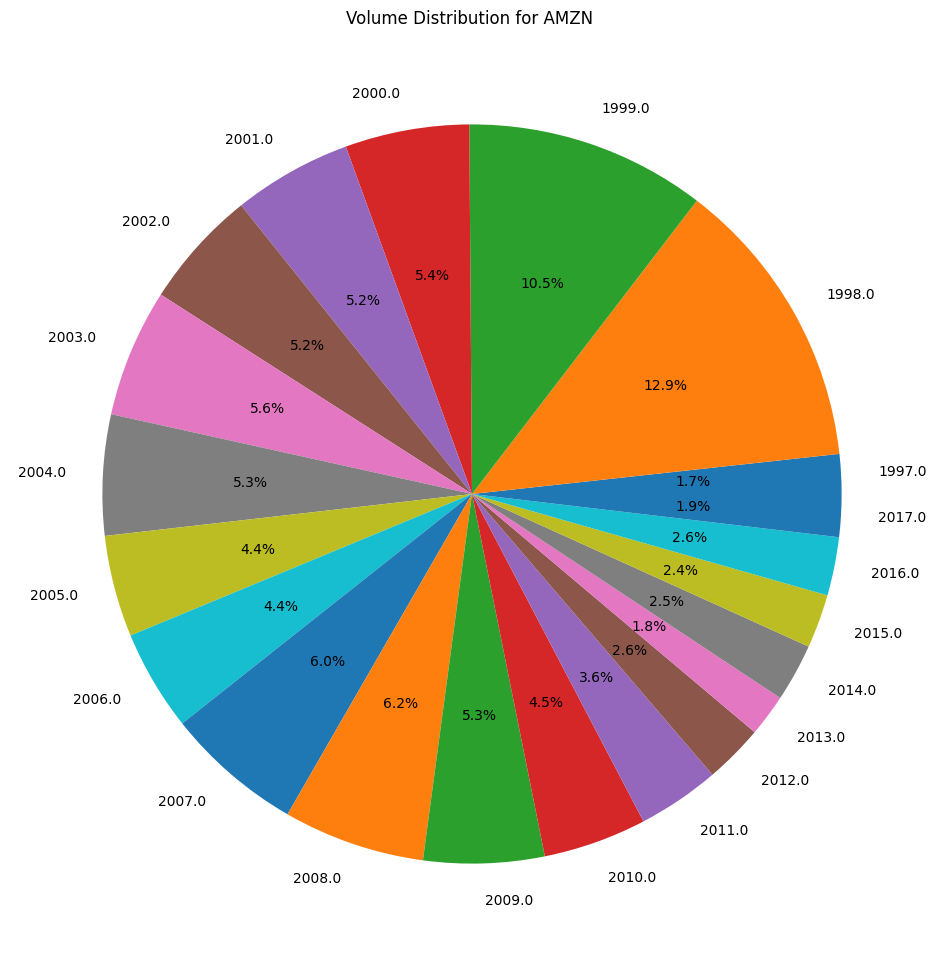

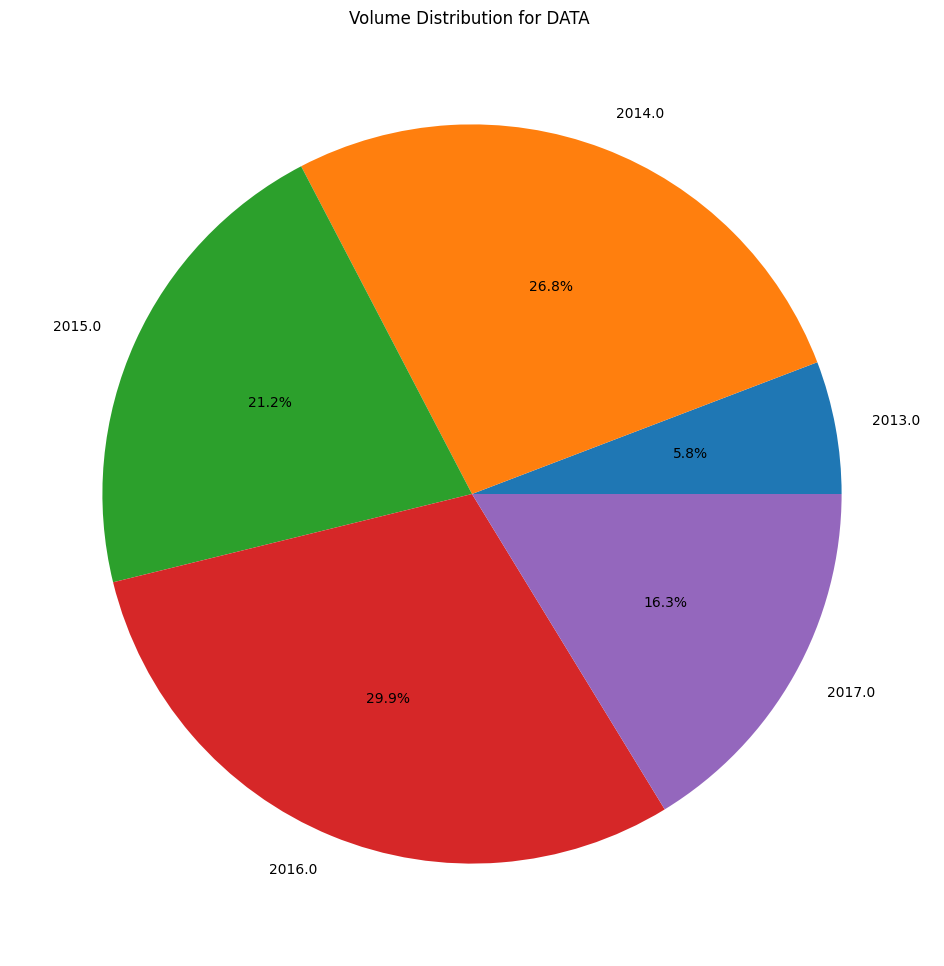

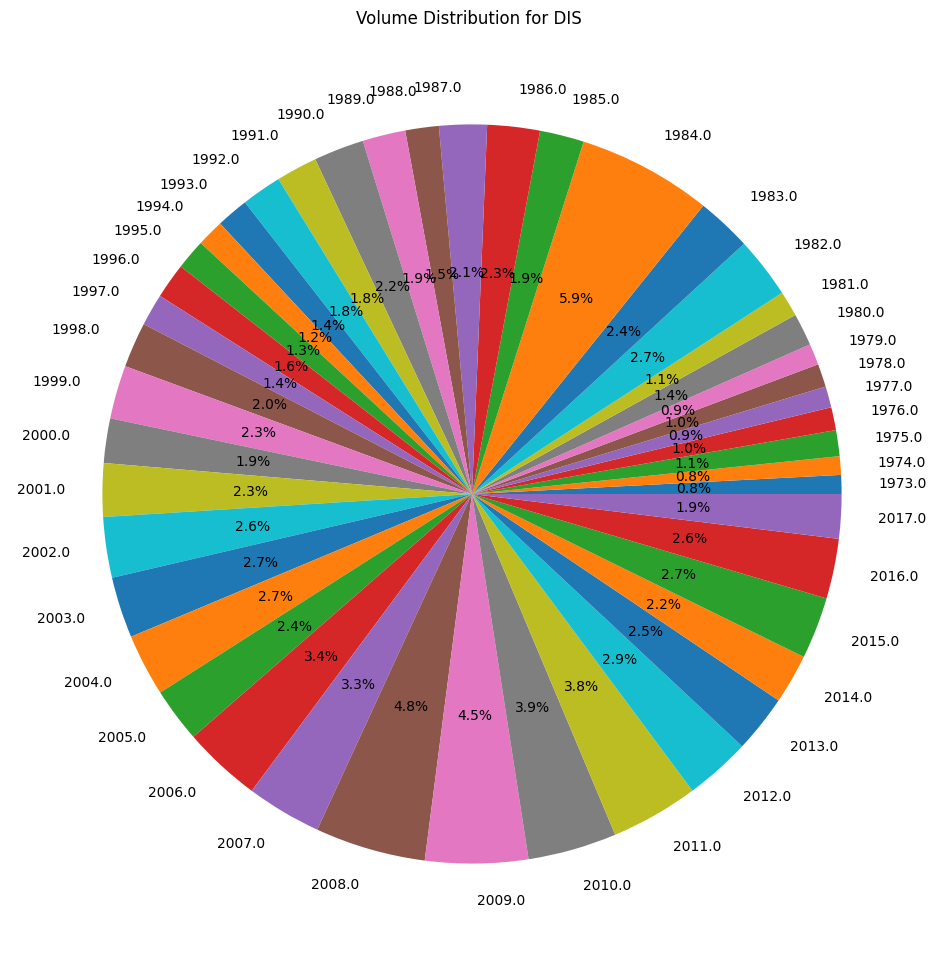

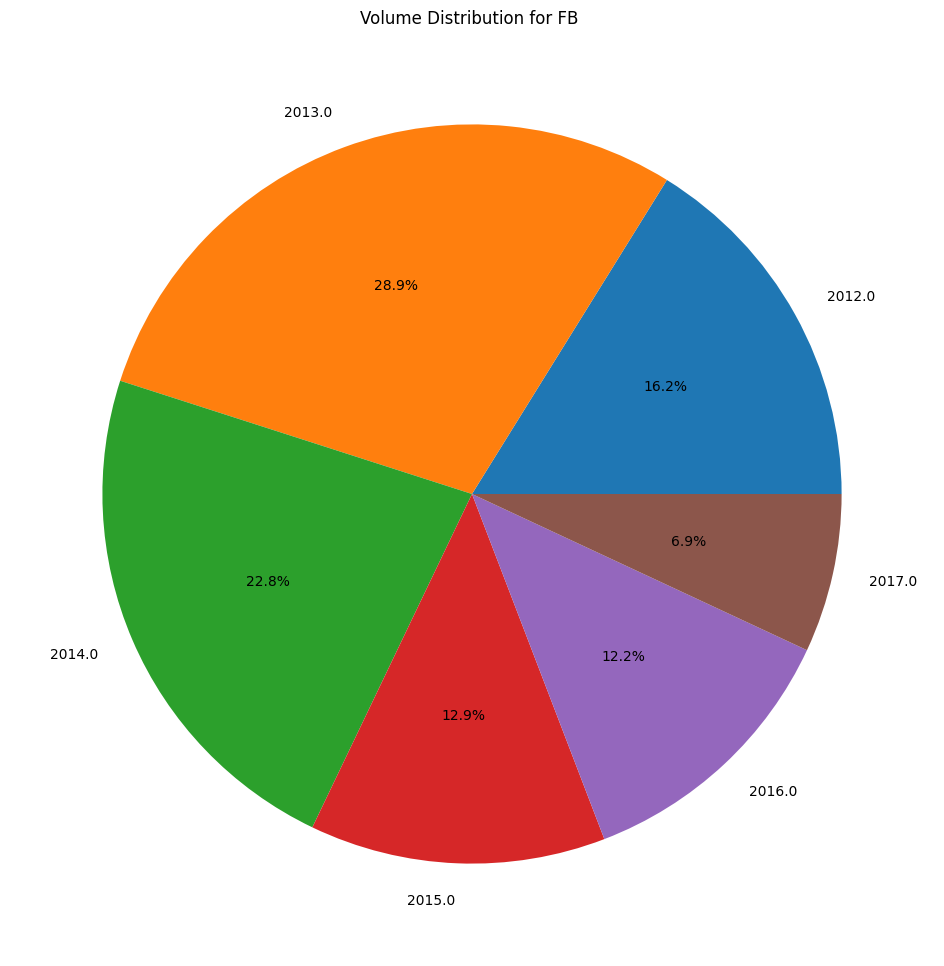

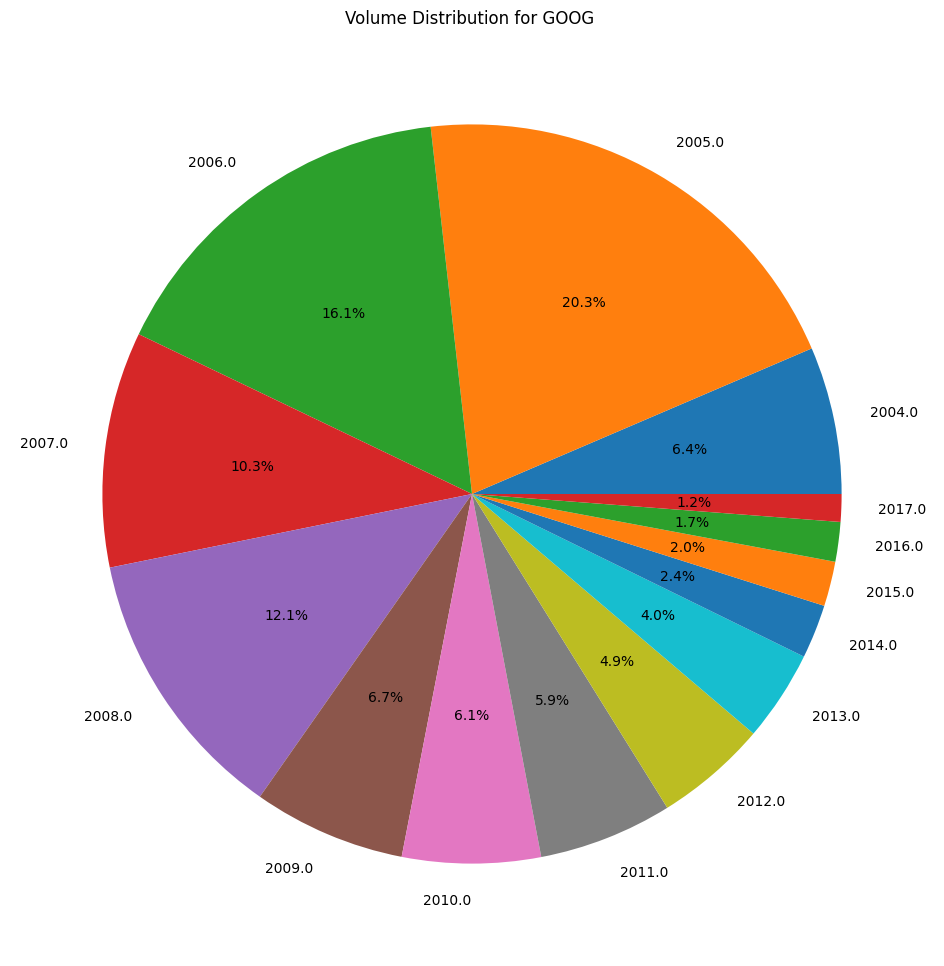

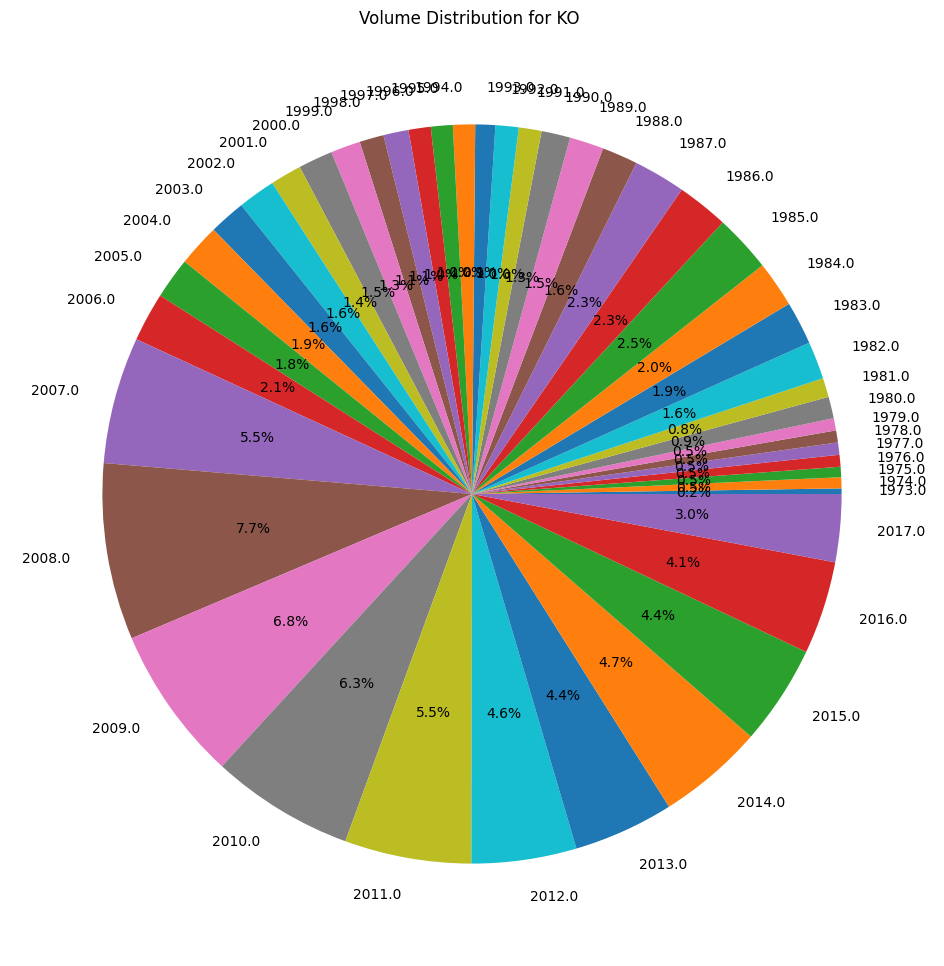

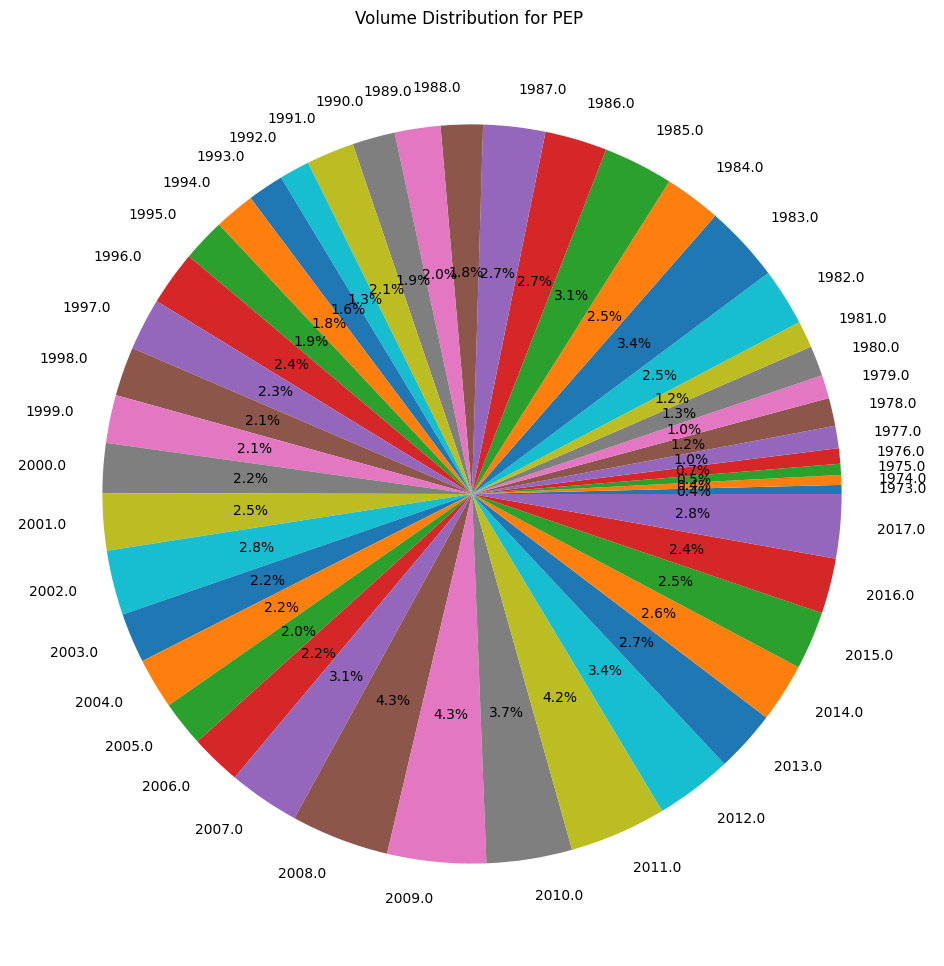

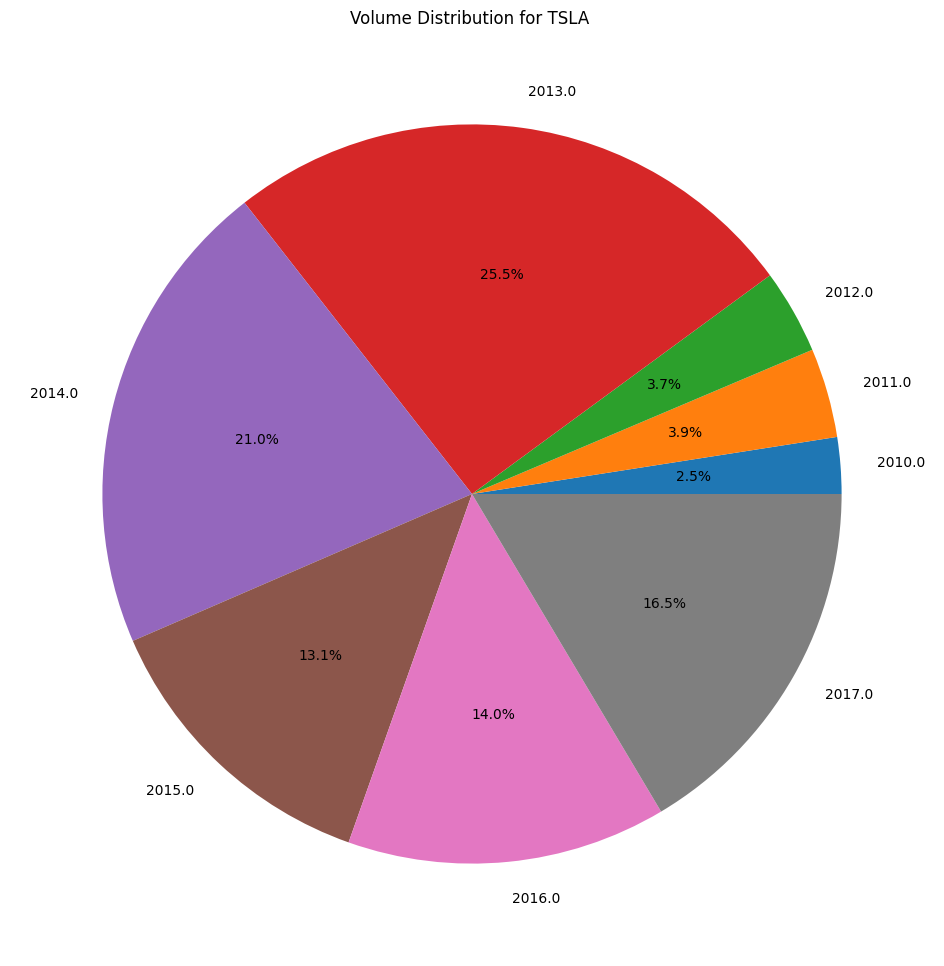

In [ ]:
# Extract year from the date column
df["Year"] = pd.to_datetime(df["Date"]).dt.year

# Group by symbol and year, calculate sum of volume
grouped_df = df.groupby(["Symbol", "Year"])["Volume"].sum()

# Create separate pie charts for each symbol
for symbol, group_data in grouped_df.groupby(level=0):
    # Extract pie chart data
    years = group_data.index.get_level_values("Year").to_numpy()
    volumes = group_data.to_numpy()

    # Create pie chart
    plt.figure(figsize=(15, 12))
    plt.pie(volumes, labels=years, autopct="%1.1f%%")
    plt.title(f"Volume Distribution for {symbol} ")
    plt.show()

### Creating Bar Charts for Average Price Over Time for Each Symbol

Here, we generate separate bar charts for the average price of each financial symbol over time. Each chart provides a visual representation of how the average price fluctuates across different years for a specific symbol.

In [ ]:
# df["Symbol"].unique()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49671 entries, 0 to 49670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Adj Close        49671 non-null  float64
 1   Close            49671 non-null  float64
 2   Date             49671 non-null  object 
 3   High             49671 non-null  float64
 4   Low              49671 non-null  float64
 5   Open             49671 non-null  float64
 6   Symbol           49671 non-null  object 
 7   Volume           49671 non-null  int64  
 8   Avg Price        49671 non-null  float64
 9   Total Avg Price  49671 non-null  float64
 10  Year             49671 non-null  int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 4.2+ MB


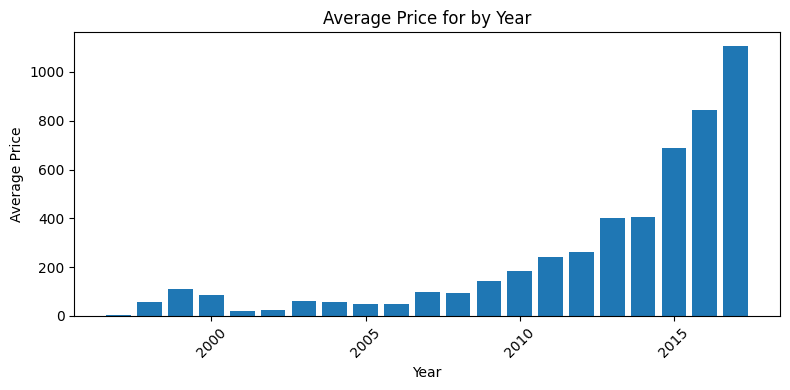

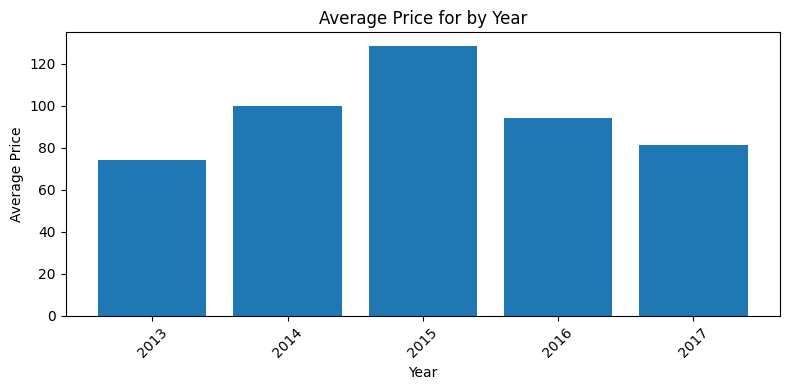

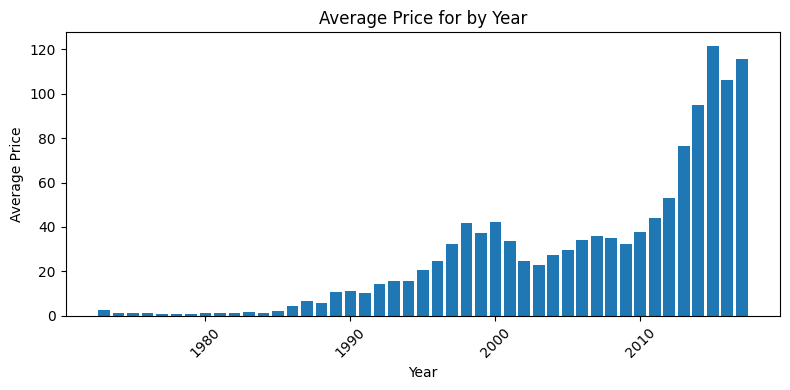

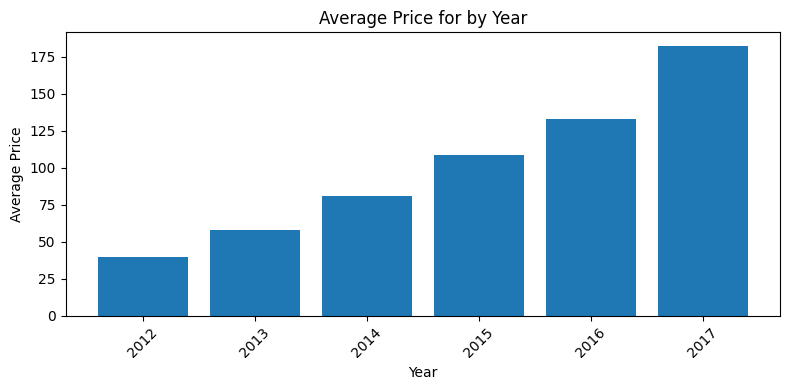

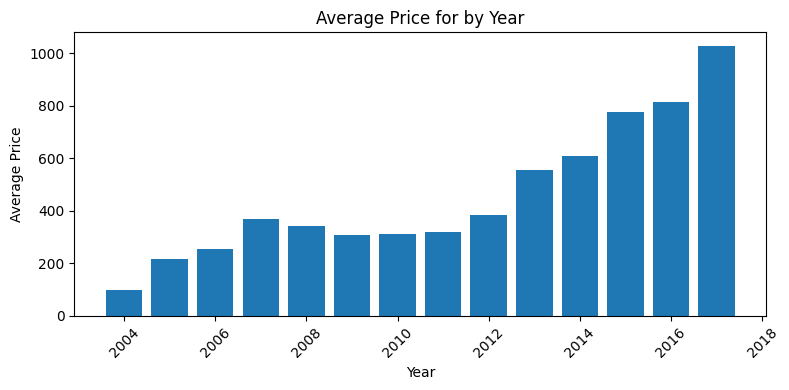

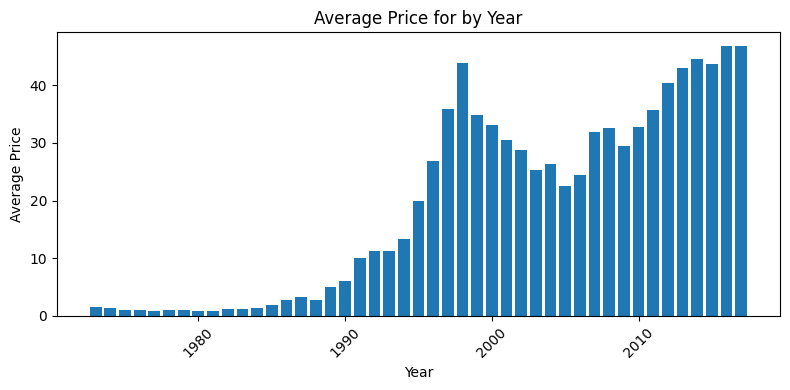

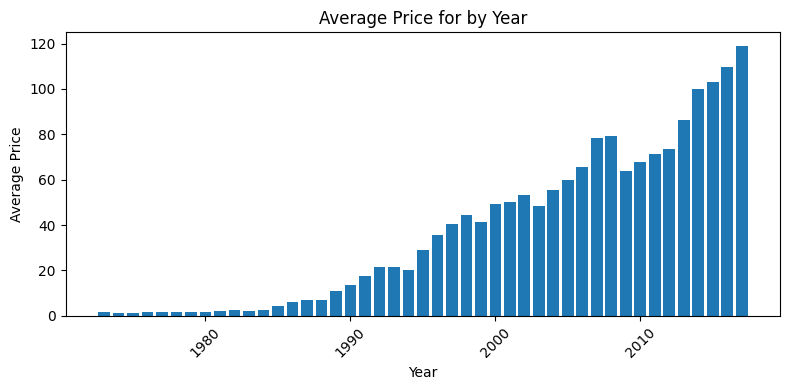

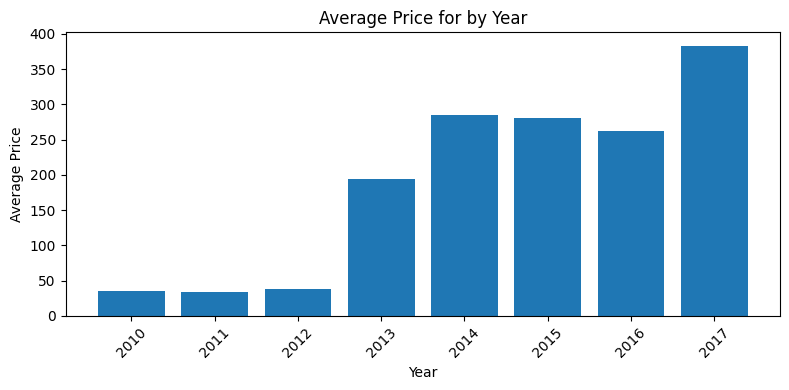

In [ ]:
# Extract year from the date column
df["Year"] = pd.to_datetime(df["Date"]).dt.year

# Iterate through each symbol
for symbol in df["Symbol"].unique():
    # Filter data for the current symbol
    symbol_data = df[df["Symbol"] == symbol]

    # Create bar chart
    plt.figure(figsize=(8, 4))
    plt.bar(symbol_data["Year"], symbol_data["Avg Price"])
    plt.xlabel("Year")
    plt.ylabel("Average Price")
    plt.title("Average Price for by Year")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Creating Scatter Plots for Average Price vs Volume for Each Symbol

Here, we generate separate scatter plots for each financial symbol, displaying the relationship between average price and trading volume. Each point on the scatter plot represents a data entry for a specific time, and the plot provides insights into potential correlations or patterns between the two variables.

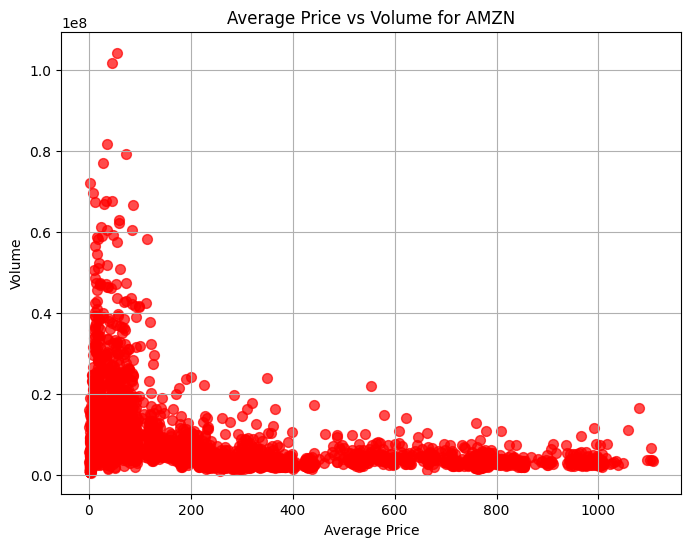

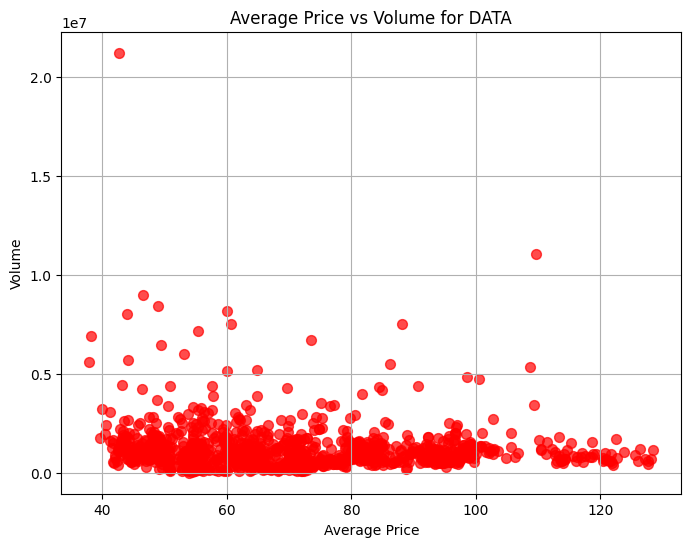

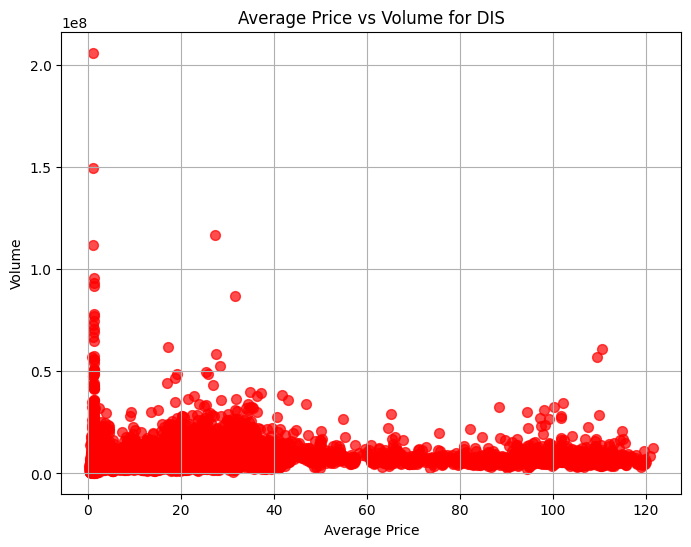

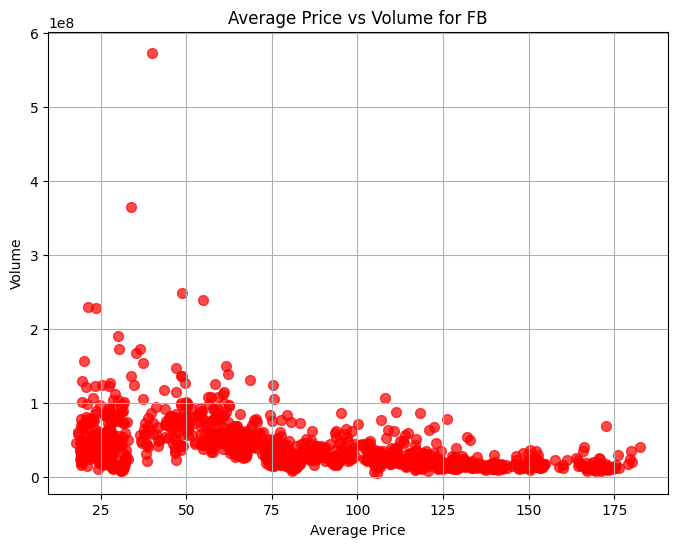

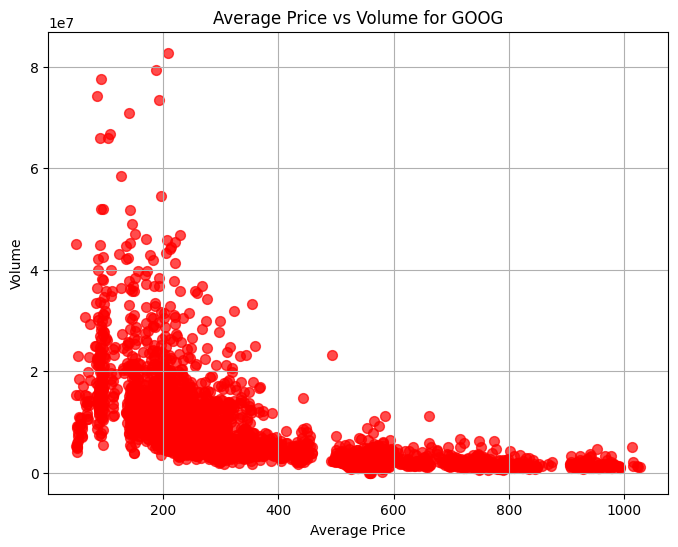

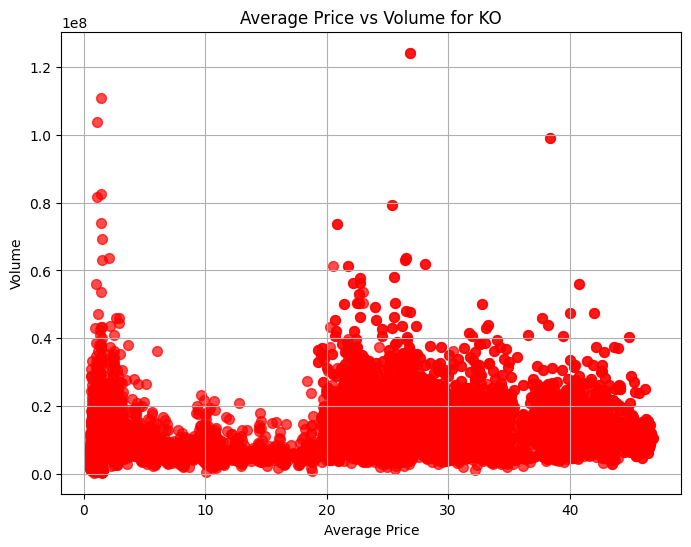

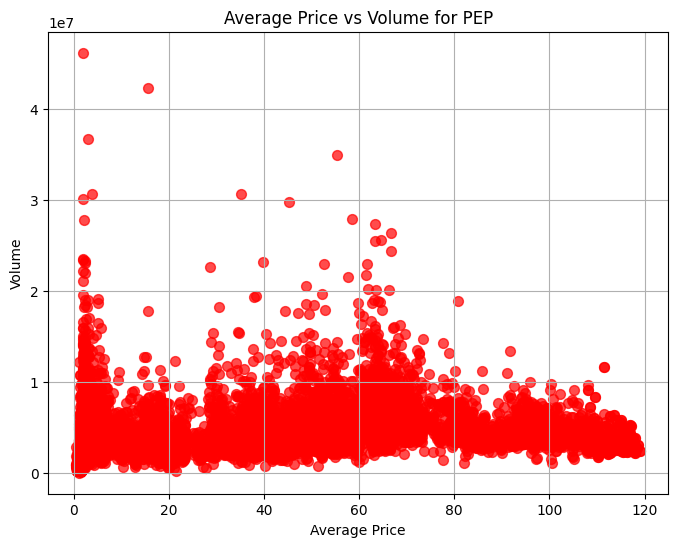

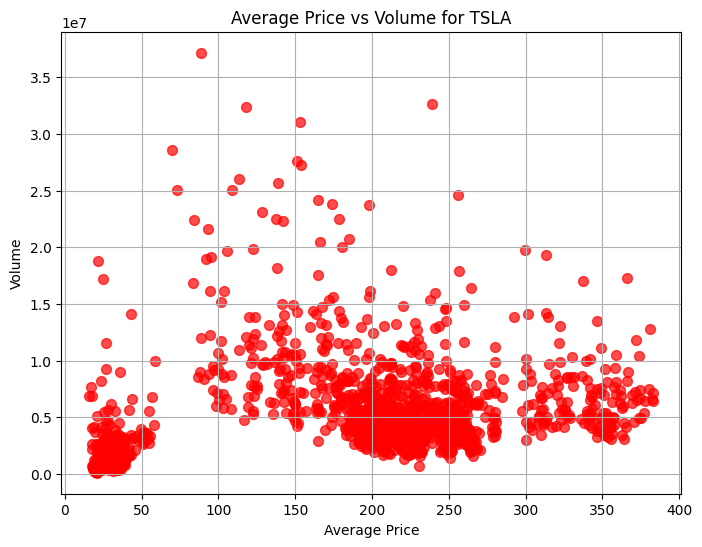

In [ ]:
# Iterate through each symbol
for symbol in df["Symbol"].unique():
    # Filter data for the current symbol
    symbol_data = df[df["Symbol"] == symbol]

    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(symbol_data["Avg Price"], symbol_data["Volume"], s=50, alpha=0.7, color='red')
    plt.xlabel("Average Price")
    plt.ylabel("Volume")
    plt.title(f"Average Price vs Volume for {symbol}")
    plt.grid(True)

    plt.show()